
# Machine Learning for Blood Donation Prediction

## Objective
This project aims to develop machine learning models to predict whether a person will donate blood or not, using advanced classification algorithms and data analysis techniques.

## Dataset Description
The dataset contains the following information:
- **Recency** : Time in months since the last time a person intended to give blood
- **Frequency** : Number of times a person intended to give blood in the past
- **Monetary** : Amount of blood given in the past
- **Time** : Time in months since the first time a person intended to give blood
- **Class** : Target variable (donated/not donated)

## Analysis Plan
1. Data loading and exploration
2. Exploratory Data Analysis (EDA)
3. Data cleaning and preprocessing
4. Machine learning modeling with multiple algorithms
5. Model evaluation and comparison



   









In [69]:
# Import necessary libraries for machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

# Configure plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('BloodTransfusion.csv', sep=';')


## 1. Data Exploration

In [70]:
# Display first rows of the dataset
print("Dataset overview:")
print(df.head())

print("\n" + "="*50)
print("General dataset information:")
print(f"Number of observations: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")

Dataset overview:
  Recency Frequency Monetary Time        Class
0       2        50    12500   98      donated
1       0        13     3250   28      donated
2       1        16     4000   35      donated
3       2        20     5000   45      donated
4       1        24     6000   77  not donated

General dataset information:
Number of observations: 748
Number of variables: 5


### Detailed Variable Information

In [71]:
# Detailed variable information
print("Data types information:")
print(df.info())

print("\n" + "="*50)
print("Descriptive statistics:")
print(df.describe())

print("\n" + "="*50)
print("Target variable distribution:")
print(df['Class'].value_counts())
print(f"Donation percentage: {df['Class'].value_counts()['donated'] / len(df) * 100:.1f}%")

Data types information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Recency    748 non-null    object
 1   Frequency  748 non-null    object
 2   Monetary   748 non-null    object
 3   Time       748 non-null    object
 4   Class      748 non-null    object
dtypes: object(5)
memory usage: 29.3+ KB
None

Descriptive statistics:
       Recency Frequency Monetary Time        Class
count      748       748      748  748          748
unique      31        33       34   79            3
top          2         1      250    4  not donated
freq       169       152      152   52          559

Target variable distribution:
Class
not donated    559
donated        176
?               13
Name: count, dtype: int64
Donation percentage: 23.5%


In [72]:
# Debug: Check data types and problematic values
print("Debugging data types and values:")
print("="*50)

# Check original data types
print("Original data types:")
print(df.dtypes)

# Check for problematic values
print("\nChecking for problematic values:")
for col in ['Recency', 'Frequency', 'Monetary', 'Time']:
    print(f"\n{col}:")
    print(f"  Unique values (first 10): {df[col].unique()[:10]}")
    print(f"  Data type: {df[col].dtype}")
    print(f"  Non-numeric values: {df[col].apply(lambda x: not str(x).replace('.', '').replace('-', '').isdigit() if pd.notna(x) else False).sum()}")


Debugging data types and values:
Original data types:
Recency      object
Frequency    object
Monetary     object
Time         object
Class        object
dtype: object

Checking for problematic values:

Recency:
  Unique values (first 10): ['2' '0' '1' '4' '?' '5' '9' '3' '12' '6']
  Data type: object
  Non-numeric values: 16

Frequency:
  Unique values (first 10): ['50' '13' '16' '20' '24' '4' '7' '12' '9' '?']
  Data type: object
  Non-numeric values: 20

Monetary:
  Unique values (first 10): ['12500' '3250' '4000' '5000' '6000' '1000' '1750' '3000' '2250' '11500']
  Data type: object
  Non-numeric values: 22

Time:
  Unique values (first 10): ['98' '28' '35' '45' '77' '4' '14' '22' '58' '47']
  Data type: object
  Non-numeric values: 24


## 2. Exploratory Data Analysis (EDA)


In [73]:
# Data cleaning
print("Cleaning data...")

# Create clean copy
df_clean = df.copy()

# Replace missing values
df_clean.replace(['?', ''], 0, inplace=True)

# Convert numeric columns
numeric_columns = ['Recency', 'Frequency', 'Monetary', 'Time']
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

# Encode target variable
le = LabelEncoder()
df_clean['Class_encoded'] = le.fit_transform(df_clean['Class'].astype(str))

print("Data cleaned successfully!")
print(f"Dataset shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Class distribution: {df_clean['Class'].value_counts().to_dict()}")


Cleaning data...
Data cleaned successfully!
Dataset shape: (748, 6)
Missing values: 0
Class distribution: {'not donated': 559, 'donated': 176, 0: 13}


In [74]:
# Quick data check
print("Data summary:")
print(f"Features: {numeric_columns}")
print(f"Target classes: {le.classes_}")



Data summary:
Features: ['Recency', 'Frequency', 'Monetary', 'Time']
Target classes: ['0' 'donated' 'not donated']


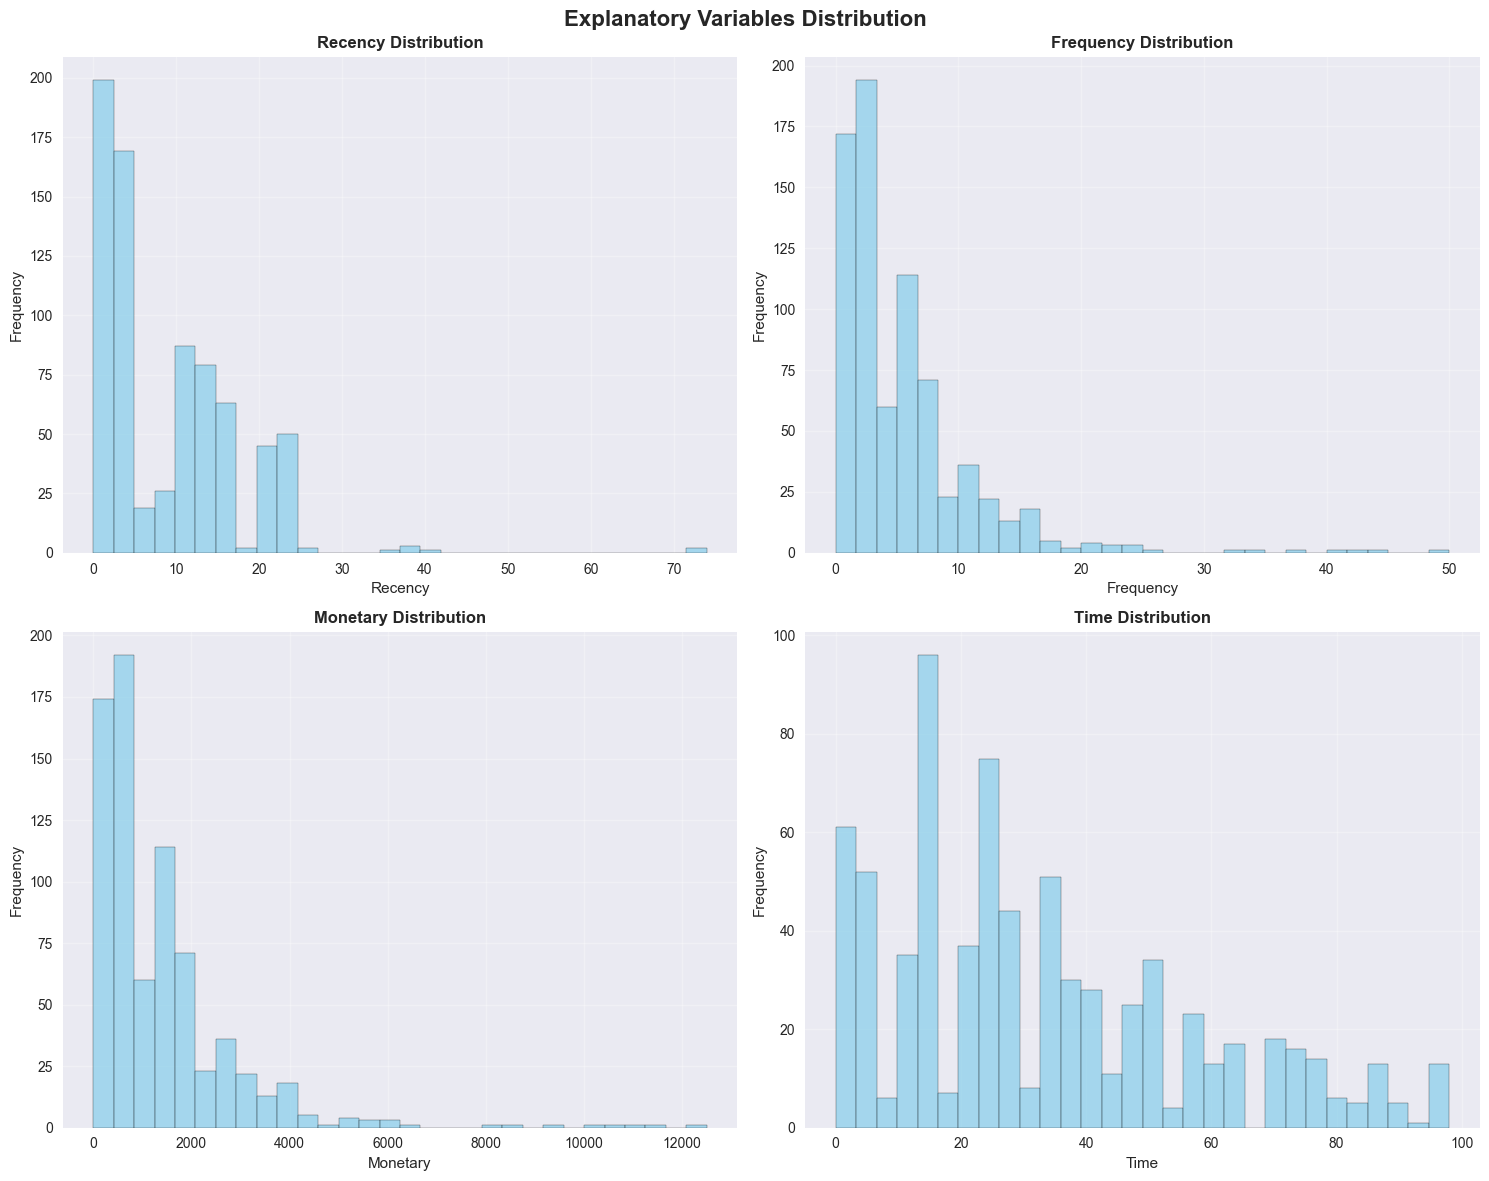

In [75]:
# Distribution visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Explanatory Variables Distribution', fontsize=16, fontweight='bold')

# Histograms
for i, col in enumerate(numeric_columns):
    ax = axes[i//2, i%2]
    df_clean[col].hist(bins=30, ax=ax, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'{col} Distribution', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

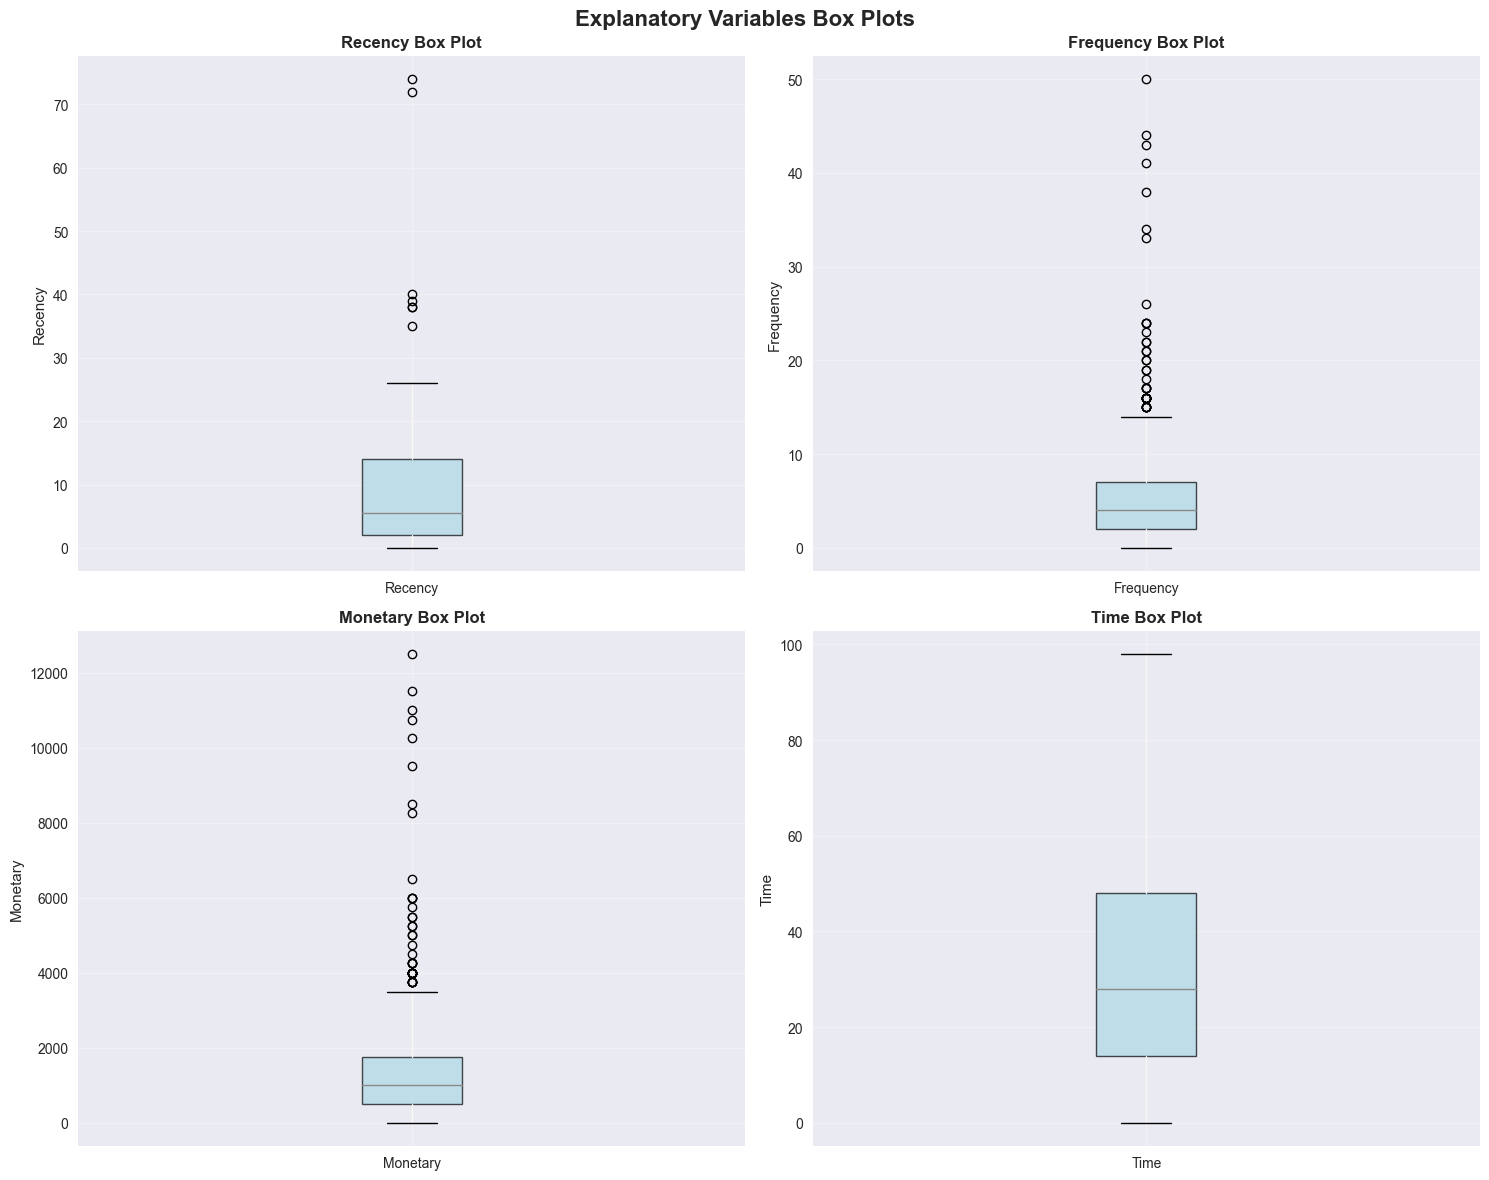

In [76]:
# Box plots to analyze outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Explanatory Variables Box Plots', fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_columns):
    ax = axes[i//2, i%2]
    df_clean.boxplot(column=col, ax=ax, patch_artist=True, 
                     boxprops=dict(facecolor='lightblue', alpha=0.7))
    ax.set_title(f'{col} Box Plot', fontweight='bold')
    ax.set_ylabel(col)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


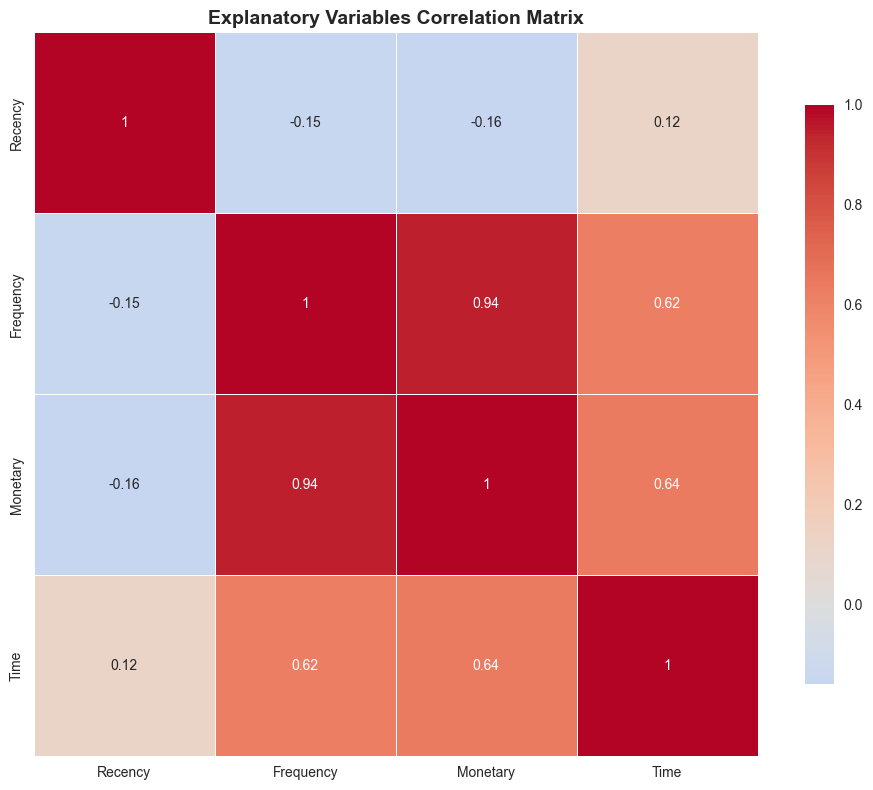

Correlation matrix:
            Recency  Frequency  Monetary      Time
Recency    1.000000  -0.149253 -0.158191  0.117722
Frequency -0.149253   1.000000  0.944525  0.621287
Monetary  -0.158191   0.944525  1.000000  0.635484
Time       0.117722   0.621287  0.635484  1.000000


In [77]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Explanatory Variables Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation matrix:")
print(correlation_matrix)


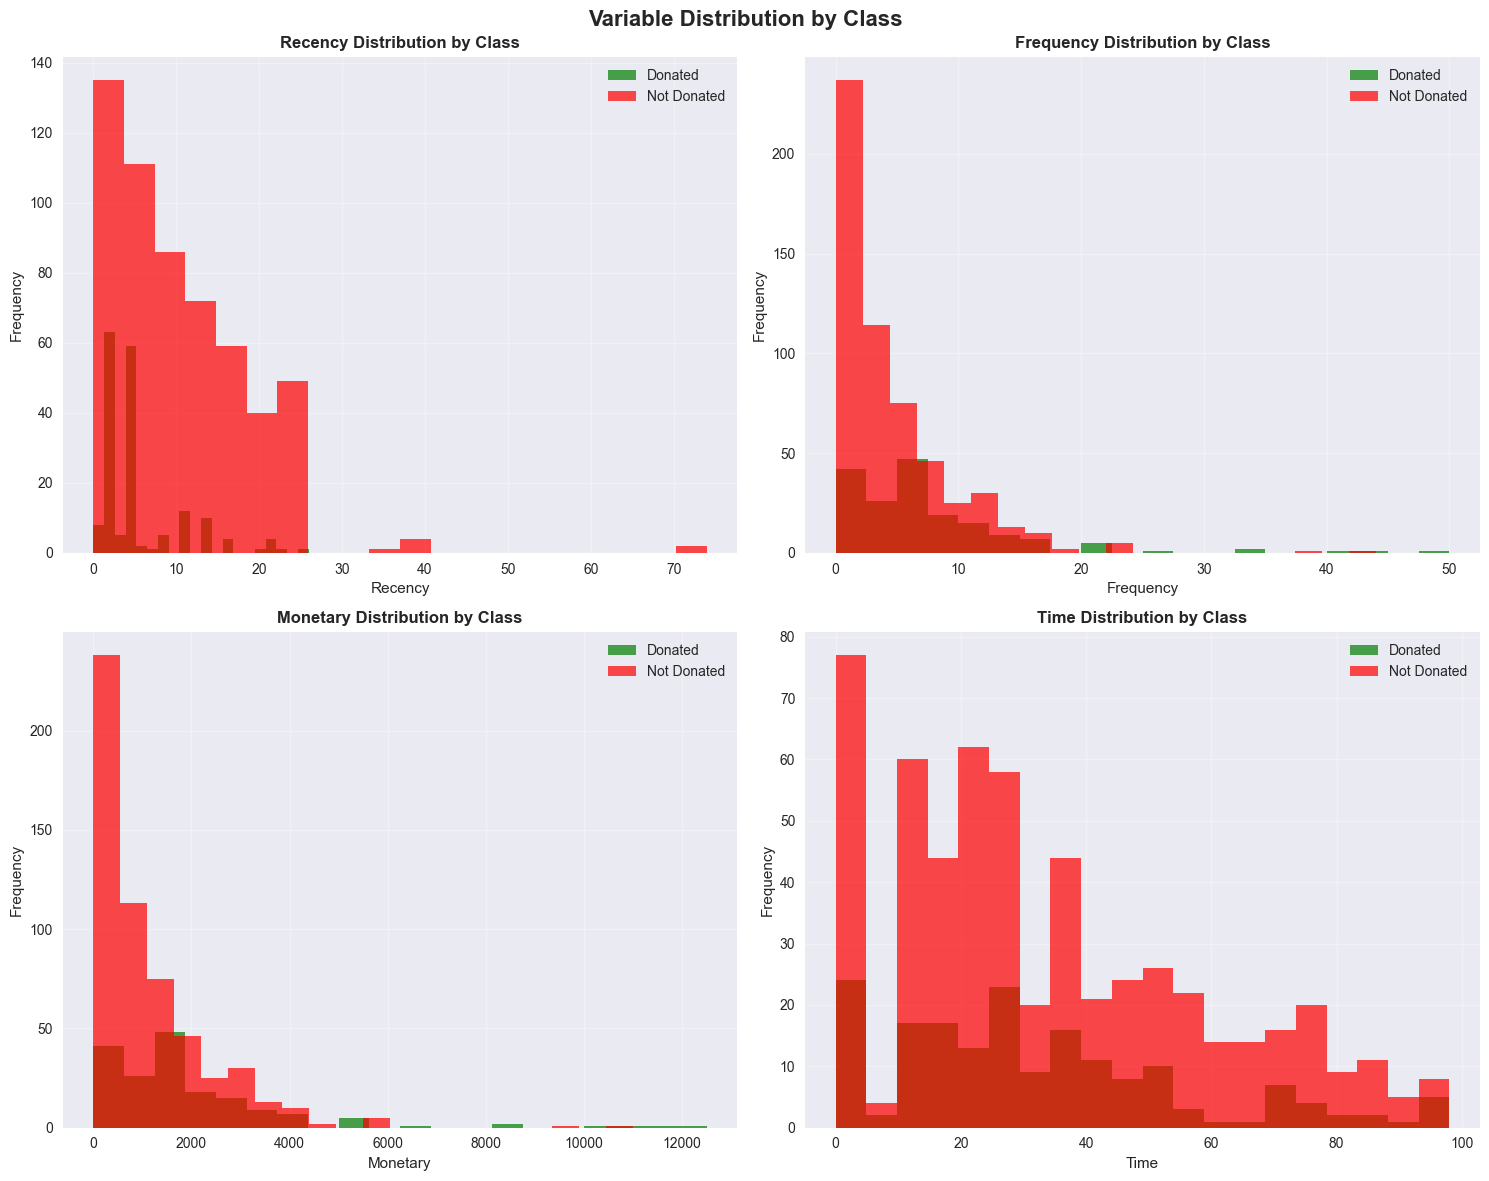

In [78]:
# Analyze distributions by class
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Variable Distribution by Class', fontsize=16, fontweight='bold')

for i, col in enumerate(numeric_columns):
    ax = axes[i//2, i%2]
    
    # Separate data by class
    donated_data = df_clean[df_clean['Class'] == 'donated'][col]
    not_donated_data = df_clean[df_clean['Class'] == 'not donated'][col]
    
    # Create histograms
    ax.hist(donated_data, alpha=0.7, label='Donated', bins=20, color='green')
    ax.hist(not_donated_data, alpha=0.7, label='Not Donated', bins=20, color='red')
    
    ax.set_title(f'{col} Distribution by Class', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Machine Learning Modeling


In [79]:
# Handle class imbalance
print("Handling class imbalance...")
print("="*50)

# Check class distribution
print(f"Original class distribution: {np.bincount(y)}")
print(f"Class proportions: {np.bincount(y) / len(y) * 100}")

# Apply SMOTE for oversampling minority class
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Create balanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

print(f"Balanced class distribution: {np.bincount(y_balanced)}")
print(f"Balanced class proportions: {np.bincount(y_balanced) / len(y_balanced) * 100}")
print(f"Dataset size: {X_balanced.shape[0]} (was {X.shape[0]})")

# Update train/test split with balanced data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Update scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")


Handling class imbalance...
Original class distribution: [ 13 176 559]
Class proportions: [ 1.73796791 23.52941176 74.73262032]
Balanced class distribution: [559 559 559]
Balanced class proportions: [33.33333333 33.33333333 33.33333333]
Dataset size: 1677 (was 748)
Training set size: 1341
Test set size: 336
Training class distribution: [447 447 447]
Test class distribution: [112 112 112]


In [80]:
# Debug: Check the actual number of classes
print("Debugging classification problem:")
print("="*50)
print(f"Unique values in target: {np.unique(y)}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Label encoder classes: {le.classes_}")
print(f"Target variable type: {type(y.iloc[0]) if hasattr(y, 'iloc') else type(y[0])}")

# Check if this is actually a binary problem
if len(np.unique(y)) == 2:
    print("✓ This is a binary classification problem")
else:
    print("⚠ This is a multiclass classification problem")
    print("The dataset seems to have more than 2 classes, which might be unexpected for blood donation prediction.")


Debugging classification problem:
Unique values in target: [0 1 2]
Number of classes: 3
Class distribution: [ 13 176 559]
Label encoder classes: ['0' 'donated' 'not donated']
Target variable type: <class 'numpy.int64'>
⚠ This is a multiclass classification problem
The dataset seems to have more than 2 classes, which might be unexpected for blood donation prediction.


In [81]:
# Prepare data for machine learning
# Separate features and target
X = df_clean[numeric_columns].copy()
y = df_clean['Class_encoded'].copy()

# Ensure all features are numeric

print(X.dtypes)
print(f"Any non-numeric values in features: {X.isnull().sum().sum()}")

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training dataset size: {X_train.shape[0]}")
print(f"Test dataset size: {X_test.shape[0]}")
print(f"Class distribution in training: {np.bincount(y_train)}")
print(f"Class distribution in test: {np.bincount(y_test)}")


Recency      int64
Frequency    int64
Monetary     int64
Time         int64
dtype: object
Any non-numeric values in features: 0
Training dataset size: 598
Test dataset size: 150
Class distribution in training: [ 10 141 447]
Class distribution in test: [  3  35 112]


In [82]:
# Define models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True, class_weight='balanced')
}

# Train and evaluate models
results = {}

print("Training and evaluating models...")
print("="*60)

for name, model in models.items():
    print(f"\nTraining model: {name}")
    
    # Training
    if name in ['Logistic Regression', 'SVM']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
    
    # Calculate metrics with balanced focus
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate additional metrics for imbalanced data
    from sklearn.metrics import precision_recall_fscore_support, classification_report
    
    # Handle AUC calculation for multiclass
    try:
        if len(np.unique(y_test)) == 2:
            # Binary classification
            if y_pred_proba.shape[1] == 2:
                auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])
            else:
                auc_score = roc_auc_score(y_test, y_pred_proba[:, 0])
        else:
            # Multiclass classification
            auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
    except:
        # Fallback if AUC calculation fails
        auc_score = 0.5
    
    # Calculate F1-score (macro average for multiclass)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
    f1_macro = f1
    
    # Cross-validation
    if name in ['Logistic Regression', 'SVM']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    results[name] = {
        'accuracy': accuracy,
        'auc': auc_score,
        'f1_macro': f1_macro,
        'precision': precision,
        'recall': recall,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"F1-Score (macro): {f1_macro:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"CV Score (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print("\n" + "="*60)
print("RESULTS SUMMARY:")
print("="*60)

# Display results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('accuracy', ascending=False)
print(results_df)


Training and evaluating models...

Training model: Logistic Regression
Accuracy: 0.6667
AUC Score: 0.8535
F1-Score (macro): 0.6448
Precision: 0.6542
Recall: 0.6907
CV Score (mean ± std): 0.6355 ± 0.0288

Training model: Decision Tree
Accuracy: 0.6467
AUC Score: 0.8025
F1-Score (macro): 0.7360
Precision: 0.7470
Recall: 0.7768
CV Score (mean ± std): 0.5937 ± 0.0220

Training model: Random Forest
Accuracy: 0.7400
AUC Score: 0.7735
F1-Score (macro): 0.5685
Precision: 0.7461
Recall: 0.5105
CV Score (mean ± std): 0.7006 ± 0.0366

Training model: Gradient Boosting
Accuracy: 0.7867
AUC Score: 0.8198
F1-Score (macro): 0.7344
Precision: 0.8046
Recall: 0.7280
CV Score (mean ± std): 0.7676 ± 0.0122

Training model: SVM
Accuracy: 0.6667
AUC Score: 0.8485
F1-Score (macro): 0.5534
Precision: 0.5905
Recall: 0.5694
CV Score (mean ± std): 0.6857 ± 0.0433

RESULTS SUMMARY:
                     accuracy       auc  f1_macro  precision    recall  \
Gradient Boosting    0.786667  0.819769  0.734417   0.80463

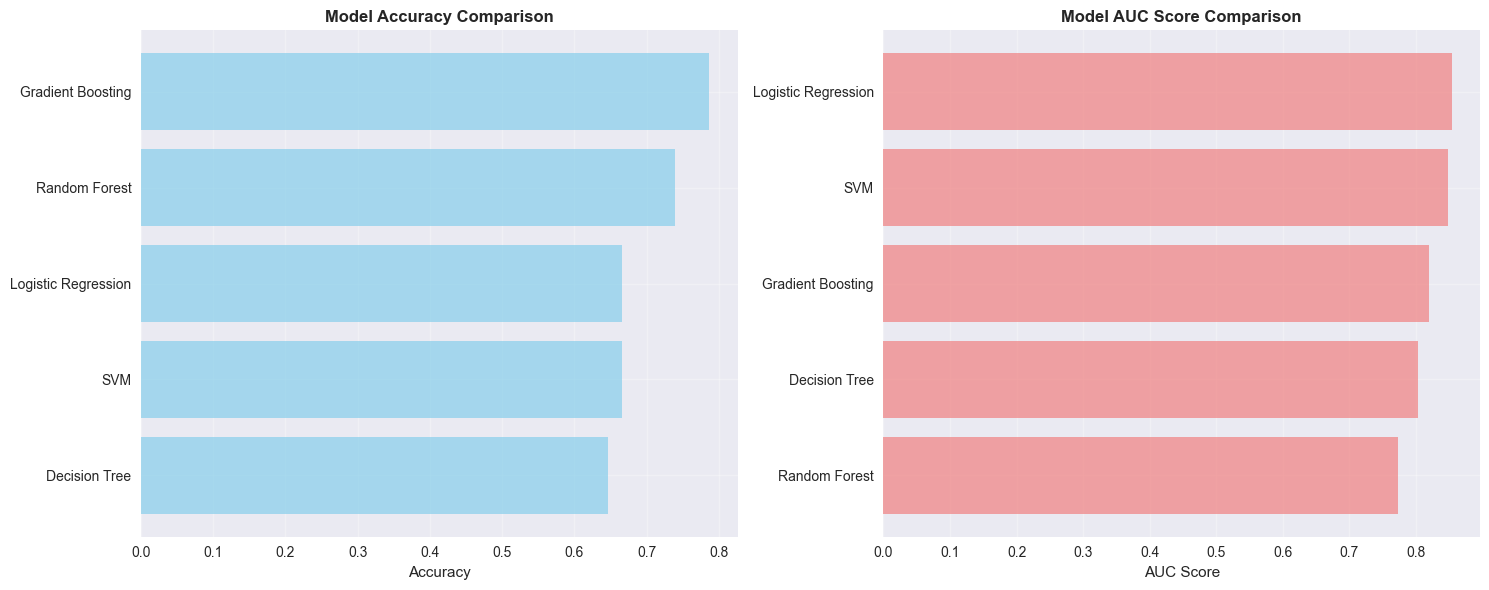

In [83]:
# Results visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy chart
results_df_sorted = results_df.sort_values('accuracy', ascending=True)
axes[0].barh(results_df_sorted.index, results_df_sorted['accuracy'], color='skyblue', alpha=0.7)
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# AUC scores chart
results_df_sorted_auc = results_df.sort_values('auc', ascending=True)
axes[1].barh(results_df_sorted_auc.index, results_df_sorted_auc['auc'], color='lightcoral', alpha=0.7)
axes[1].set_xlabel('AUC Score')
axes[1].set_title('Model AUC Score Comparison', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Detailed analysis of the best model (Random Forest):
Confusion matrix:
[[ 1  1  1]
 [ 0 10 25]
 [ 0 15 97]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.38      0.29      0.33        35
           2       0.79      0.87      0.83       112

    accuracy                           0.72       150
   macro avg       0.72      0.50      0.55       150
weighted avg       0.70      0.72      0.70       150


Feature importance:
     feature  importance
3       Time    0.434388
0    Recency    0.249160
2   Monetary    0.163696
1  Frequency    0.152755


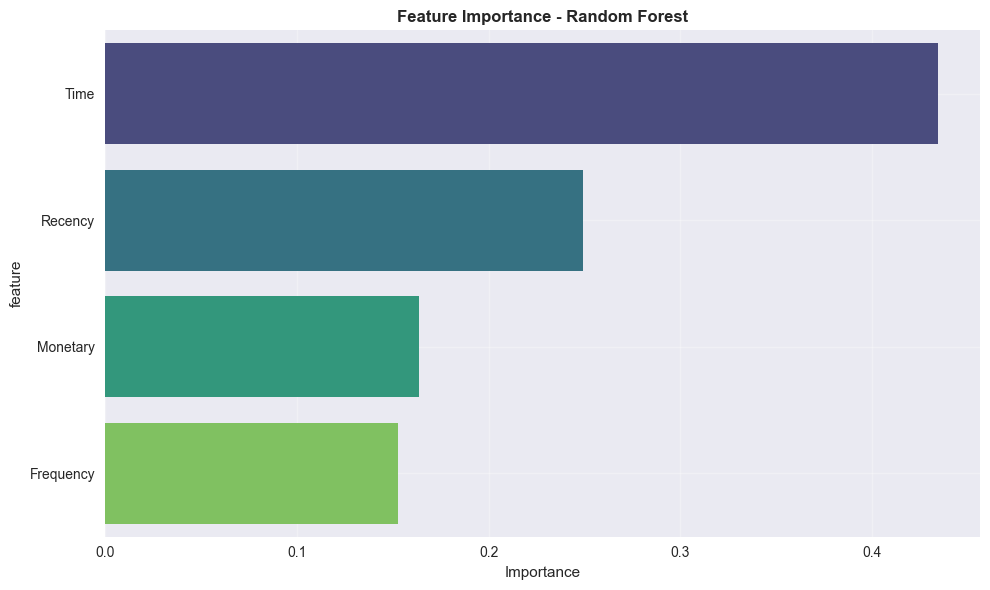

In [84]:
# Best model analysis (Random Forest)
print("Detailed analysis of the best model (Random Forest):")
print("="*60)

# Train the best model
best_model = RandomForestClassifier(random_state=42, n_estimators=100)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion matrix:")
print(cm)

# Classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred_best))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': numeric_columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature importance:")
print(feature_importance)

# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontweight='bold')
plt.xlabel('Importance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
